In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Векторизованная реализация**

In [2]:
def get_max_before_zero_vectorize(X):
    mask = X == 0
    if(np.any(mask)):
        mask = np.concatenate((np.array([False]), mask), axis=0)
        ans = X[mask[: -1]]
        if ans.size != 0:
            return ans.max()


**Частичо векторизованная реализация**

In [3]:
def get_max_before_zero_semi_vectorize(X):
    mask = np.where(X == 0)[0]
    if(mask.size > 0):
        if(mask[0] + 1 >= X.size):
            return None
        m = X[mask[0] + 1]
        for i in range(1, mask.size):
            if(mask[i] + 1 < X.size and m < X[mask[i] + 1]):
                m = X[mask[i] + 1]
        return m


**Не векторизованная реализация**

In [4]:
def get_max_before_zero_not_vectorize(X):
    flag = False
    m = None
    for i in range(1,len(X)):
        if(X[i-1] == 0):
            flag = True
        if(X[i-1]==0 and (m is None or m < X[i])):
            m = X[i]
    if(flag):
        return m

## Исследование

In [19]:
N = 5
time = []
for i in range(1, N + 1):
    X = np.random.normal(0, 10, 10**i).astype(int)
    X_list = list(X)
    t1 = %timeit -q -o get_max_before_zero_vectorize(X)
    t2 = %timeit -q -o get_max_before_zero_semi_vectorize(X)
    t3 = %timeit -q -o get_max_before_zero_not_vectorize(X_list)
    time.append((t1.average, t2.average, t3.average))
time = np.array(time)

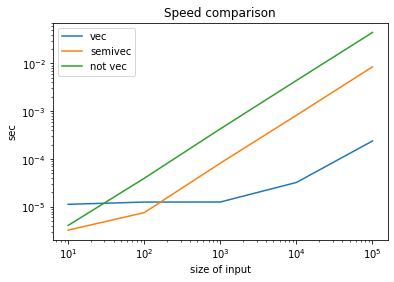

In [21]:
y = np.array([10, 100, 1000, 10000, 100000])

plt.yscale("log")
plt.xscale("log")
plt.plot(y, time[:,0], label = "vec")
plt.plot(y, time[:,1], label = "semivec")
plt.plot(y, time[:,2], label = "not vec")

plt.ylabel("sec")
plt.xlabel("size of input")
plt.title("Speed comparison")
plt.legend()
plt.show()

## Выводы
Ожидаемо, что векторизованная реализация будет быстрее(но тоже имеет линейную сложность).

Также ожидаемо, что не векторизованная реализация будет самой медленной.

Неоднозначно лишь с полувекторизованной реализацией. Мне кажется в каких-нибудь спецефичных случаях она может быть даже быстрее векторизованной.

Далеко не всегда в голову сходу приходят идеи реализации чисто с помощью методов numpy, поэтому симбиоз чистого питона и numpy скорее всего будет лучшим решением, если учесть скорость разработки и читаемось кода.